In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

data = {
    "Voltage_Stable": [1, 0, 1, 0, 1, 0, 1, 0],
    "RAM_Error": [0, 1, 0, 1, 0, 1, 0, 1],
    "CPU_Overheat": [0, 0, 1, 1, 0, 0, 1, 1],
    "Fault_Type": ["PSU", "RAM", "CPU", "CPU+RAM", "PSU", "RAM", "CPU", "CPU+RAM"]
}

df = pd.DataFrame(data)
X = df.drop("Fault_Type", axis=1)
y = df["Fault_Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.3333333333333333
Confusion Matrix:
 [[0 0 0]
 [0 1 0]
 [2 0 0]]


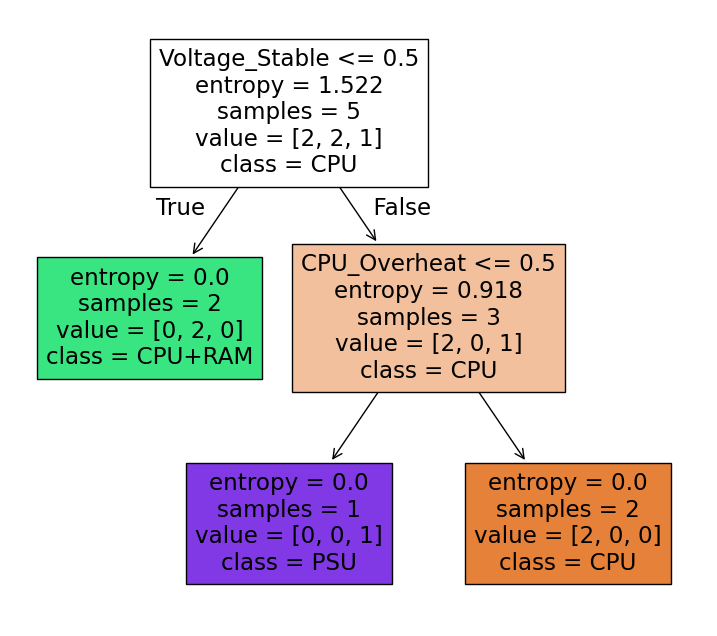

In [11]:

plt.figure(figsize=(9, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()

In [12]:

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(criterion="entropy", ccp_alpha=alpha)
    clf_pruned.fit(X_train, y_train)
    clfs.append(clf_pruned)

test_acc = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]
best_alpha = ccp_alphas[test_acc.index(max(test_acc))]
print("Best alpha for pruning:", best_alpha)

Best alpha for pruning: 0.0
